In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json

import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd

#import cv2_
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE
from sklearn.metrics import confusion_matrix
import random
import tensorflow as tf  # framework
from tensorflow import keras  # for tf.keras
import tensorflow_addons as tfa  # LAMB optimizer and gaussian_blur_2d function
import numpy as np  # np.random.random
import matplotlib.pyplot as plt  # graphs
import datetime  # tensorboard logs naming

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 128
hidden_units = 512
projection_units = 256
num_epochs = 2
dropout_rate = 0.5

temperature = 0.05

In [2]:

def list_lowest_level_subdirectories(directory_path):
    print("boo")
    lowest_level_subdirectories = []

    for root, dirs, files in os.walk(directory_path):
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            # Check if the current directory doesn't contain any subdirectories
            if not any(os.path.isdir(os.path.join(dir_path, sub_dir)) for sub_dir in os.listdir(dir_path)):
                lowest_level_subdirectories.append(dir_path)
    #print(lowest_level_subdirectories)
    return lowest_level_subdirectories

def collect_images_and_lengths(directory_paths):
    
    print("directory_paths")
    images_list = []
    lengths_list = []
    train_features = []
    q = 0
    for directory_path in directory_paths:
        #print(directory_path)
        q = q + 1
        if(q==30):
            print(q)
            break
        image_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

        image = 0

        for image_path in image_paths:
            try:
                with Image.open(image_path) as img:
                    # Check if the image is not in RGB mode
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    img = img.resize((32, 32), Image.ANTIALIAS)  # Resize to 16x16
                    img = np.array(img).astype('float32') / 255.0  # Convert to float and normalize
                    images_list.append(img)
                    if(image == 0 ):
                        train_features.append(img)
                    image= image + 1
            except Exception as e:
                print(f"Error reading or converting image '{image_path}': {e}")
        lengths_list.append((image))
        
    return images_list, lengths_list


# Specify the directory path
start_directory = r'E:\invasive-aquatic-species-data'

# Get a list of lowest-level subdirectories
lowest_level_subdirectories = list_lowest_level_subdirectories(start_directory)

# Collect images and lengths for subdirectories
images_list, lengths_list = collect_images_and_lengths(lowest_level_subdirectories)

a = np.sum(lengths_list)

BATCH_SIZE = 16
# Width and height of image
IMAGE_SIZE = 32



boo
directory_paths


C:\Users\shaif\AppData\Local\Temp\ipykernel_25536\2641338692.py:37: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((32, 32), Image.ANTIALIAS)  # Resize to 16x16


30


In [3]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
import random


def pick(idx, lst):
    
    res = random.choice(lst) 
    return res

    
def get_lbp(img, r=1, pts=8):
    
    if len(img.shape) == 3:
        img = rgb2gray(img)
    
    # Convert the image to integer type to avoid the warning
    img = (img * 255).astype('uint8')
    
    lbp = local_binary_pattern(img, pts, r, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=256, range=(0, 256))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

import random
import numpy as np

def pick(idx, lst):
    # Reference image and its LBP features
    ref_img = lst[idx]   
    ref_lbp = get_lbp(ref_img)

    dist = []
    
    # Compare the reference image to each image in the list
    for img in lst:
        lbp_feat = get_lbp(img)
        # Compare the reference image to each image in the list using Chi-Square distance
        dist_val = 0.5 * np.sum(((ref_lbp - lbp_feat) ** 2) / (ref_lbp + lbp_feat + 1e-10))  # Chi-Square distance
        dist.append(dist_val)

    # Find the indices of the three largest distances
    top_3_idx = np.argsort(dist)[-3:]  # Get the last 3 indices (largest distances)
    
    # Pick one of the top 3 randomly
    selected_idx = random.choice(top_3_idx)
    
    # Return the image corresponding to the randomly selected index
    res = lst[selected_idx]
    
    return res


from tqdm import tqdm
dataset = []

for i in tqdm(range(0,len(lengths_list))):
    a = int(np.sum(lengths_list[:i])) #0,  27, 65, 95
    
    b = a+lengths_list[i]    # 27, 65, 95
    lst = images_list[a:b]
    
    #print(np.shape(lst))
    index = 0
    for k in lst:
        pairs = []
        augment = pick(index,lst)
        pairs.append(k)
        pairs.append(augment)
        dataset.append(pairs)
        index = index+1
        
print(np.shape(dataset))



(696, 2, 32, 32, 3)


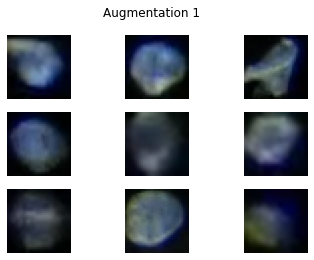

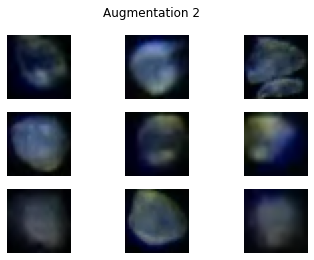

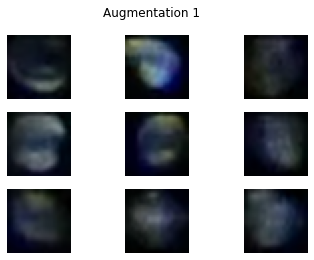

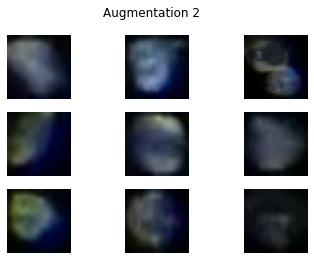

In [4]:

import tensorflow as tf

class BTDatasetCreator:
    def __init__(self, seed: int = 1024):
        self.seed = seed

    def split_pairs(self, ds: list) -> tf.data.Dataset:
        # Split pairs into a1 and a2
        a1 = [pair[0] for pair in ds]
        a2 = [pair[1] for pair in ds]

        return (tf.data.Dataset.from_tensor_slices((a1, a2))
                .shuffle(1000, seed=self.seed)
                .batch(BATCH_SIZE, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

    def __call__(self, ds: list) -> tf.data.Dataset:
        return self.split_pairs(ds)


bt_creator = BTDatasetCreator()
augment_versions = bt_creator(dataset)
sample_augment_versions = iter(augment_versions)


def plot_values(batch: tuple):
    fig, axs = plt.subplots(3, 3)
    fig1, axs1 = plt.subplots(3, 3)

    fig.suptitle("Augmentation 1")
    fig1.suptitle("Augmentation 2")

    a1, a2 = batch

    # plots images on both tables
    for i in range(3):
        for j in range(3):
            # CHANGE(add / 255)
            axs[i][j].imshow(a1[3 * i + j])
            axs[i][j].axis("off")
            axs1[i][j].imshow(a2[3 * i + j])
            axs1[i][j].axis("off")

    plt.show()

#for _ in range(2):  # Plot 5 different batches
#    batch = next(sample_augment_versions)
#    plot_values(batch)

In [5]:

class BarlowLoss(keras.losses.Loss):


    def __init__(self, batch_size: int):

        super().__init__()
        self.lambda_amt = 5e-3
        self.batch_size = batch_size

    def get_off_diag(self, c: tf.Tensor) -> tf.Tensor:
   
        zero_diag = tf.zeros(c.shape[-1])
        return tf.linalg.set_diag(c, zero_diag)

    def cross_corr_matrix_loss(self, c: tf.Tensor) -> tf.Tensor:
     
        # subtracts diagonals by one and squares them(first part)
        c_diff = tf.pow(tf.linalg.diag_part(c) - 1, 2)

        # takes off diagonal, squares it, multiplies with lambda(second part)
        off_diag = tf.pow(self.get_off_diag(c), 2) * self.lambda_amt

        # sum first and second parts together
        loss = tf.reduce_sum(c_diff) + tf.reduce_sum(off_diag)

        return loss

    def normalize(self, output: tf.Tensor) -> tf.Tensor:
    

        return (output - tf.reduce_mean(output, axis=0)) / tf.math.reduce_std(
            output, axis=0
        )

    def cross_corr_matrix(self, z_a_norm: tf.Tensor, z_b_norm: tf.Tensor) -> tf.Tensor:
        
        return (tf.transpose(z_a_norm) @ z_b_norm) / self.batch_size

    def call(self, z_a: tf.Tensor, z_b: tf.Tensor) -> tf.Tensor:
        
        z_a_norm, z_b_norm = self.normalize(z_a), self.normalize(z_b)
        c = self.cross_corr_matrix(z_a_norm, z_b_norm)
        loss = self.cross_corr_matrix_loss(c)
        return loss


In [6]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D

class ResNet34:

    def __call__(self, shape=(32, 32, 3)):
        
        inputs = Input(shape=shape)
        base_model = ResNet50(include_top=False, weights="imagenet", input_shape=shape, pooling="avg")
        x = base_model(inputs)
        output = Dense(2048)(x)
        new_model = Model(inputs=inputs, outputs=output)

        return new_model

resnet = ResNet34()()
#resnet.summary()

def build_twin() -> keras.Model:


    # number of dense neurons in the projector
    n_dense_neurons = 5000

    # encoder network
    resnet = ResNet34()()
    last_layer = resnet.layers[-1].output

    # intermediate layers of the projector network
    n_layers = 2
    for i in range(n_layers):
        dense = tf.keras.layers.Dense(n_dense_neurons, name=f"projector_dense_{i}")
        if i == 0:
            x = dense(last_layer)
        else:
            x = dense(x)
        x = tf.keras.layers.BatchNormalization(name=f"projector_bn_{i}")(x)
        x = tf.keras.layers.ReLU(name=f"projector_relu_{i}")(x)

    x = tf.keras.layers.Dense(n_dense_neurons, name=f"projector_dense_{n_layers}")(x)

    model = keras.Model(resnet.input, x)
    return model


class BarlowModel(keras.Model):
   

    def __init__(self):
        super().__init__()
        self.model = build_twin()
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, batch: tf.Tensor) -> tf.Tensor:
       
        # get the two augmentations from the batch
        y_a, y_b = batch

        with tf.GradientTape() as tape:
            # get two versions of predictions
            z_a, z_b = self.model(y_a, training=True), self.model(y_b, training=True)
            loss = self.loss(z_a, z_b)

        grads_model = tape.gradient(loss, self.model.trainable_variables)

        self.optimizer.apply_gradients(zip(grads_model, self.model.trainable_variables))
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}



In [7]:
bm = BarlowModel()
loss = BarlowLoss(BATCH_SIZE)

bm.compile(optimizer='Adam', loss=loss)

history = bm.fit(augment_versions, epochs=2)

Epoch 1/2
43/43 [==============================] - 25s 93ms/step - loss: 20630.2930
Epoch 2/2
43/43 [==============================] - 3s 77ms/step - loss: 31525.3262


In [12]:
from sklearn.metrics.pairwise import cosine_distances
import random
import numpy as np
import tensorflow as tf
from tqdm import tqdm

class BTDatasetCreator:
    def __init__(self, seed: int = 1024):
        self.seed = seed

    def split_pairs(self, ds: list) -> tf.data.Dataset:
        a1 = [pair[0] for pair in ds]
        a2 = [pair[1] for pair in ds]
        return (tf.data.Dataset.from_tensor_slices((a1, a2))
                .shuffle(1000, seed=self.seed)
                .batch(BATCH_SIZE, drop_remainder=True)
                .prefetch(tf.data.AUTOTUNE))

    def __call__(self, ds: list) -> tf.data.Dataset:
        return self.split_pairs(ds)

def create_bt_dataset(images_list, lengths_list, bm, batch_size):
    def pick(idx, lst, model):
        ref_img = lst[idx]
        ref_feat = model(np.expand_dims(ref_img, axis=0), training=False).numpy()
        dist = [cosine_distances(ref_feat, model(np.expand_dims(img, axis=0), training=False).numpy())[0][0] 
                for img in lst]
        hard_neg_idx = np.argsort(dist)[1]  # second closest image
        return lst[hard_neg_idx]

    dataset = []
    for i in tqdm(range(len(lengths_list))):#lengths_list
        a, b = int(np.sum(lengths_list[:i])), int(np.sum(lengths_list[:i + 1]))
        lst = images_list[a:b]
        for idx, img in enumerate(lst):
            augment = pick(idx, lst, bm.model)
            dataset.append([img, augment])

    bt_creator = BTDatasetCreator()
    augment_versions = bt_creator(dataset)
    return augment_versions

# Example usage:
BATCH_SIZE = 32  # Define your batch size
augment_versions = create_bt_dataset(images_list, lengths_list, bm, BATCH_SIZE)
sample_augment_versions = iter(augment_versions)


 31%|█████████████████                                      | 9/29 [08:29<18:52, 56.61s/it]


KeyboardInterrupt: 

In [11]:
# Define batch size
BATCH_SIZE = 32

# Loop for 5 iterations
for iteration in range(5):
    print(f"Iteration {iteration + 1}")

    # Create dataset for this iteration
    augment_versions = create_bt_dataset(images_list, lengths_list, bm, BATCH_SIZE)

    # Initialize and compile model
    bm = BarlowModel()
    loss = BarlowLoss(BATCH_SIZE)
    bm.compile(optimizer='Adam', loss=loss)

    # Fit the model
    history = bm.fit(augment_versions, epochs=2)

    # Optional: Track the history or results for each iteration
    print(f"Iteration {iteration + 1} completed.\n")


Epoch 1/2
43/43 [==============================] - 14s 93ms/step - loss: 16495.3809
Epoch 2/2
43/43 [==============================] - 4s 84ms/step - loss: 28359.9512


In [ ]:
from keras.models import load_model
bm.model.save("inv_ssl_loop.h5")